<a href="https://colab.research.google.com/github/Karanuderani07/ML_LEARNING/blob/main/MLPIPELINE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
from google.colab import files

In [ ]:
files.upload()

Saving housing.csv to housing.csv


{'housing.csv': b'longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity\n-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY\n-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY\n-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY\n-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY\n-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY\n-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY\n-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY\n-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.12,241400.0,NEAR BAY\n-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY\n-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY\n-122.26,37.85,52.0,2202.0,434.0,910.0,402.0,3.2031,281500.0,NEAR BAY\n-122.26,37.85,52.0,3503.0,752.0,1504.0,734.0,3.2705,241800.0,NEAR BAY\n-

In [ ]:
df = pd.read_csv('housing.csv')

df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
print("Information : \n")
print(df.info())

print("\nMissing Values : \n")
print(df.isnull().sum())

print("\nDuplicate Rows : \n")
print(df.duplicated().sum())

print("Statistical Summary : \n")
print(df.describe())

Information : 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None

Missing Values : 

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
me

In [ ]:

df.dropna(subset=['total_bedrooms'],inplace = True)

df = df.reset_index()
df = df.drop(['index'],axis=1)



encoder = OneHotEncoder(sparse_output=False)
encode = encoder.fit_transform(df[['ocean_proximity']])
encoded_df = pd.DataFrame(encode,columns = encoder.get_feature_names_out(['ocean_proximity']))

df = df.drop(['ocean_proximity'],axis=1)

df = pd.concat([df,encoded_df],axis=1)

In [ ]:
x = df.drop('median_house_value',axis=1)
y = df['median_house_value']

x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=1,test_size=0.2)

In [ ]:
tree_model = DecisionTreeRegressor(random_state=1)


tree_model.fit(x_train,y_train)


tree_y_pred = tree_model.predict(x_test)

MSE = mean_squared_error(y_test,tree_y_pred)
R2 = r2_score(y_test,tree_y_pred)

print("Decison Tree Evaluation : \n")

print('Mean Squared Error (MSE) : ',MSE)
print('R2 Score : ',R2)

Decison Tree Evaluation : 

Mean Squared Error (MSE) :  4715415017.317348
R2 Score :  0.6453738744045618


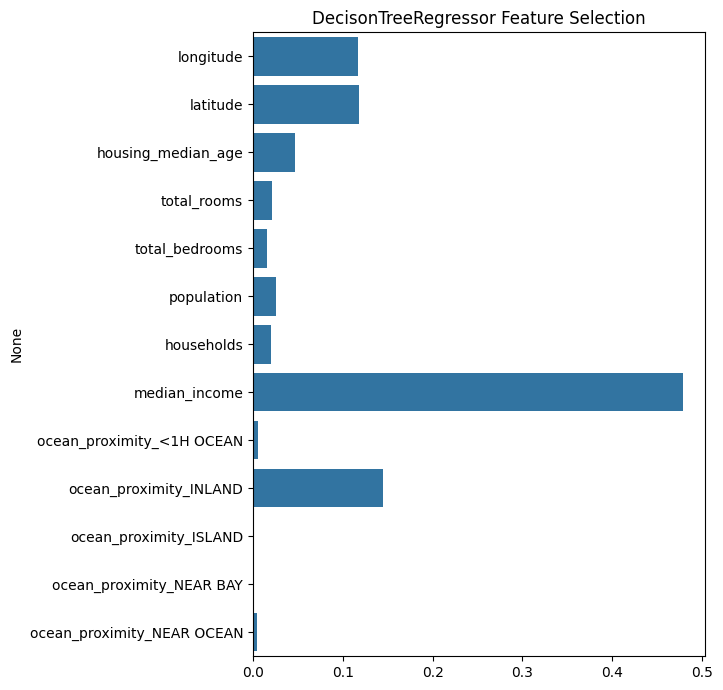

In [ ]:
plt.figure(figsize=(12,7))

important_features_tree = tree_model.feature_importances_
features = x_train.columns
plt.subplot(1,2,1)
sns.barplot(x=important_features_tree,y=features)
plt.title("DecisonTreeRegressor Feature Selection")
plt.tight_layout()
plt.show()

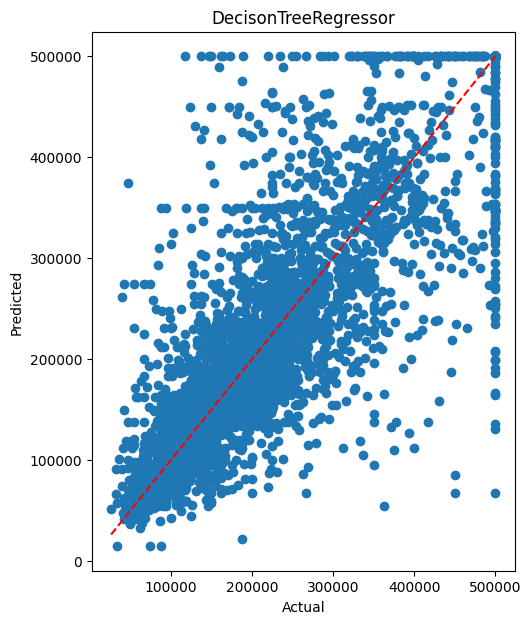

In [ ]:
plt.figure(figsize=(12,7))

plt.subplot(1,2,1)
plt.scatter(y_test,tree_y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("DecisonTreeRegressor")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')


Bias: 0.6303049525974002
Variance: 0.00029144037493780093
Average Mean Squared Error: 4928044523.414661
Average R2 Score: 0.6303049525974002
Average Mean Absolute Error: 44483.81316778972


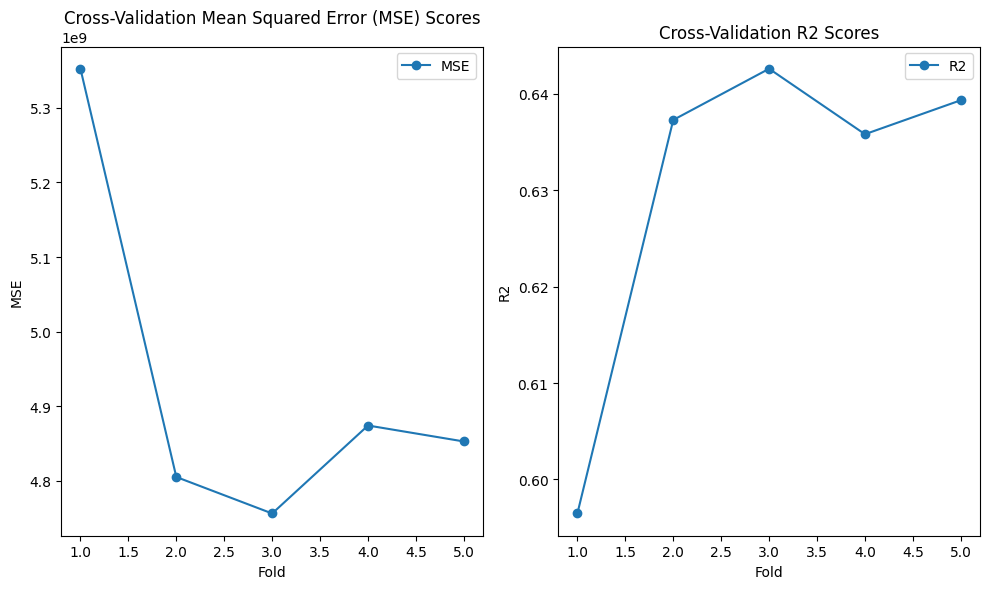


Random Forest Bias: 0.8144082024653907
Random Forest Variance: 0.00013189202576133771
Random Forest Average Mean Squared Error: 2473725782.079308
Random Forest Average R2 Score: 0.8144082024653907
Random Forest Average Mean Absolute Error: 32416.389172836854


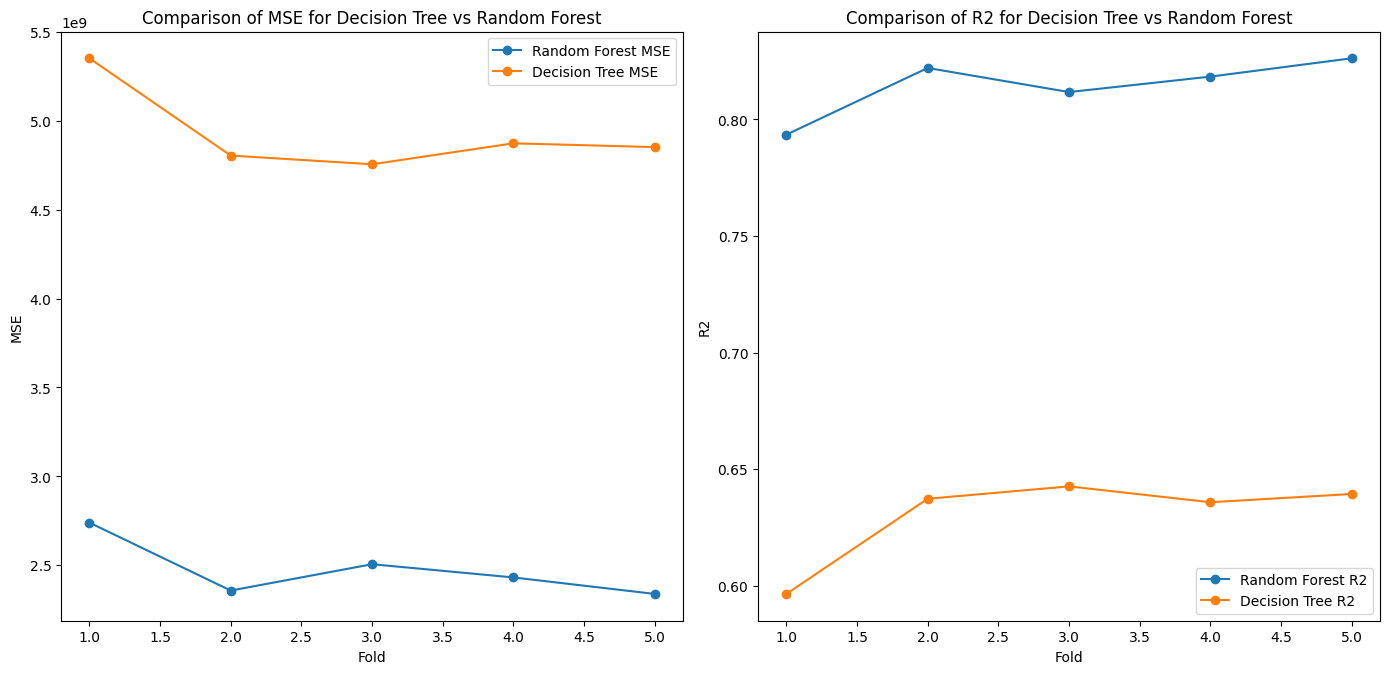

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import mean_absolute_error
import numpy as np

model = DecisionTreeRegressor(random_state=1)

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

mse_scores = []
r2_scores = []
mae_scores = []

for train_idx, test_idx in kfold.split(x_train, np.digitize(y_train, bins=np.linspace(min(y_train), max(y_train), 5))):
    X_train_k, X_test_k = x_train.iloc[train_idx], x_train.iloc[test_idx]
    y_train_k, y_test_k = y_train.iloc[train_idx], y_train.iloc[test_idx]

    model.fit(X_train_k, y_train_k)

    y_pred_k = model.predict(X_test_k)

    mse_scores.append(mean_squared_error(y_test_k, y_pred_k))
    r2_scores.append(r2_score(y_test_k, y_pred_k))
    mae_scores.append(mean_absolute_error(y_test_k, y_pred_k))

bias = np.mean(r2_scores)
variance = np.var(r2_scores)

print(f"\nBias: {bias}")
print(f"Variance: {variance}")
print(f"Average Mean Squared Error: {np.mean(mse_scores)}")
print(f"Average R2 Score: {np.mean(r2_scores)}")
print(f"Average Mean Absolute Error: {np.mean(mae_scores)}")

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.plot(np.arange(1, len(mse_scores) + 1), mse_scores, label="MSE", marker='o')
plt.title('Cross-Validation Mean Squared Error (MSE) Scores')
plt.xlabel('Fold')
plt.ylabel('MSE')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(np.arange(1, len(r2_scores) + 1), r2_scores, label="R2", marker='o')
plt.title('Cross-Validation R2 Scores')
plt.xlabel('Fold')
plt.ylabel('R2')
plt.legend()

plt.tight_layout()
plt.show()

rf_model = RandomForestRegressor(random_state=1)

rf_mse_scores = []
rf_r2_scores = []
rf_mae_scores = []

for train_idx, test_idx in kfold.split(x_train, np.digitize(y_train, bins=np.linspace(min(y_train), max(y_train), 5))):
    X_train_k, X_test_k = x_train.iloc[train_idx], x_train.iloc[test_idx]
    y_train_k, y_test_k = y_train.iloc[train_idx], y_train.iloc[test_idx]

    rf_model.fit(X_train_k, y_train_k)

    y_pred_k_rf = rf_model.predict(X_test_k)

    rf_mse_scores.append(mean_squared_error(y_test_k, y_pred_k_rf))
    rf_r2_scores.append(r2_score(y_test_k, y_pred_k_rf))
    rf_mae_scores.append(mean_absolute_error(y_test_k, y_pred_k_rf))

rf_bias = np.mean(rf_r2_scores)
rf_variance = np.var(rf_r2_scores)

print(f"\nRandom Forest Bias: {rf_bias}")
print(f"Random Forest Variance: {rf_variance}")
print(f"Random Forest Average Mean Squared Error: {np.mean(rf_mse_scores)}")
print(f"Random Forest Average R2 Score: {np.mean(rf_r2_scores)}")
print(f"Random Forest Average Mean Absolute Error: {np.mean(rf_mae_scores)}")

plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.plot(np.arange(1, len(rf_mse_scores) + 1), rf_mse_scores, label="Random Forest MSE", marker='o')
plt.plot(np.arange(1, len(mse_scores) + 1), mse_scores, label="Decision Tree MSE", marker='o')
plt.title('Comparison of MSE for Decision Tree vs Random Forest')
plt.xlabel('Fold')
plt.ylabel('MSE')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(np.arange(1, len(rf_r2_scores) + 1), rf_r2_scores, label="Random Forest R2", marker='o')
plt.plot(np.arange(1, len(r2_scores) + 1), r2_scores, label="Decision Tree R2", marker='o')
plt.title('Comparison of R2 for Decision Tree vs Random Forest')
plt.xlabel('Fold')
plt.ylabel('R2')
plt.legend()

plt.tight_layout()
plt.show()
